# Laboratory work 3
## DataFrames Merging, Data Aggregation and Data Visualization
<legend>Tokiya Hiruma КН-221іб.е</legend>

In [1044]:
#import libraries
import pandas as pd
import numpy as np
from IPython.display import display

In [1045]:
# Task 1. Load the energy data from the file “En_In.xls”, which is a list of indicators
# of energy supply and renewable electricity production, and put into a DataFrame.
Energy = pd.read_excel('En_In.xls')
Energy = Energy.drop(columns=['Unnamed: 0', 'Unnamed: 1']).drop(range(0,17)).drop(range(244,282)).reset_index(drop=True)
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable']

display(Energy)

,Country,Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,321,10,78.669
1,Albania,102,35,100
2,Algeria,1959,51,0.551
3,American Samoa,...,...,0.641
4,Andorra,9,121,88.696
...,...,...,...,...
222,Viet Nam,2554,28,45.322
223,Wallis and Futuna Islands,0,26,0
224,Yemen,344,13,0
225,Zambia,400,26,99.715


In [1046]:
# Task 2. Convert ‘Energy Supply’ to gigajoules (Note: there are 1,000,000 gigajoules
# in a petajoule). For all countries which have missing data (e.g. data with "...")
# make sure this is reflected as np.NaN values.

Energy = Energy.replace(['...', np.nan], 0)
Energy['Energy Supply'] = pd.to_numeric(Energy['Energy Supply']) * 1000000
Energy = Energy.replace([0], np.nan)

pd.options.display.float_format = "{:.3f}".format
display(Energy)

,Country,Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,NaN,26.000,NaN
224,Yemen,344000000.000,13.000,NaN
225,Zambia,400000000.000,26.000,99.715


In [1047]:
# Task 3. There are several countries with numbers and/or parenthesis in their name. Be
# sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be ‘Bolivia’, 
# ‘Switzerland17’ should be Switzerland’.

Energy['Country'].replace('\d+', '', regex=True, inplace=True)
Energy['Country'] = Energy['Country'].str.replace(r'/^[a-zA-Z ]*$','', regex=True, flags=re.IGNORECASE)
Energy['Country'] = Energy['Country'].str.replace(r'\([^)]*\)', '', regex=True, flags=re.IGNORECASE)
Energy['Country'] = Energy['Country'].str.strip()

display(Energy)

,Country,Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,NaN,26.000,NaN
224,Yemen,344000000.000,13.000,NaN
225,Zambia,400000000.000,26.000,99.715


In [1048]:
# Task 4. Rename the following list of countries:
#"Republic of Korea": "South Korea",
#"United States of America": "United States", 
#"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
#"China, Hong Kong Special Administrative Region": "Hong Kong"

Energy['Country'] = Energy['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})

display(Energy)

,Country,Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,NaN,26.000,NaN
224,Yemen,344000000.000,13.000,NaN
225,Zambia,400000000.000,26.000,99.715


In [1063]:
# Expected output for tasks 1-4
display(Energy.loc[Energy["Country"].isin(["American Samoa", "Bolivia", "South Korea"])])

,Country,Energy Supply,Energy Supply per Capita,%Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
164,South Korea,11007000000.000,221.000,2.279


In [1070]:
# Task 5. Next, load the GDP data from the file “gpd.csv”, which is a csv
# containing countries’ GDP from 1960 to 2015 from World Bank.

# read csv file and skip needless rows
GDP = pd.read_csv('gpd.csv', skiprows=3)
GDP.columns = GDP.iloc[0]
GDP = GDP.drop([0])

# Make sure to skip the header, and rename the following list of countries:
# "Korea, Rep.": "South Korea",
# "Iran, Islamic Rep.": "Iran",
# "Hong Kong SAR, China": "Hong Kong"

GDP['Country Name'] = GDP['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

# convert year columns names to int type
years = GDP[GDP.columns[50:]]
years.columns = years.columns.astype(int)
GDP = pd.concat([GDP[GDP.columns[:4]], years], axis=1)

display(GDP.head(1))

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


In [1071]:
# Task 6. Load the Sciamgo Journal and Country Rank data for Energy Engineering and
# Power Technology from the file “scimagojr.xlsx”, which ranks countries based on
# their journal contributions in the aforementioned area.

Scimagojr = pd.read_excel('scimagojr.xlsx', nrows=15)
display(Scimagojr)


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
5,6,Canada,17899,17620,215003,40930,12.010,149
6,7,Germany,17027,16831,140566,27426,8.260,126
7,8,India,15005,14841,128763,37209,8.580,115
8,9,France,13153,12973,130632,28601,9.930,114
9,10,South Korea,11983,11923,114675,22595,9.570,104


In [1073]:
# Task 7. Join the three datasets from tasks 1-6 into a new dataset (using the intersection of country names).
# - Use only the last 10 years (2006-2015) of GDP data and only the top 15
# countries by Scimagojr 'Rank' (Rank 1 through 15).
# - The index of this DataFrame should be the name of the country, and the columns
# should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
# 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
# Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

Result = Scimagojr.merge(Energy, how="left", on='Country')
Result = Result.merge(GDP, how="left", left_on='Country', right_on="Country Name").drop(columns=GDP[GDP.columns[:4]])

Result = Result.set_index("Country")
display(Result.head(3))
display(Result.shape)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,%Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


(15, 20)

In [1074]:
# Task 8. Create a function to define what are the top 15 countries for average GDP over the last 10 years
def task_eight():
    gdp_cols = Result[Result.columns[10:]].mean(axis=1)
    display(gdp_cols.sort_values(ascending=False))

In [1075]:
task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

In [1078]:
# Task 9. Create a function to define by how much had the GDP changed over the past 10
# year for the country with the 5th largest average GDP
def task_nine():
    gdp_cols = Result[Result.columns[10:]].mean(axis=1).sort_values(ascending=False)
    display(Result)
    fifth = gdp_cols.iloc[[4]].index.values.tolist()[0]
    difference = Result.loc[fifth][2015] - Result.loc[fifth][2006]
    print (fifth, difference)

In [1079]:
task_nine()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,%Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970
United Kingdom,4,20944,20357,206091,37874,9.840,139,7920000000.000,124.000,10.600,2419630700401.730,2482203235475.900,2470614405284.300,2367047611711.990,2403504326328.800,2450911011124.850,2479808627472.190,2533370110012.360,2605643189894.930,2666333396477.130
Russian Federation,5,18534,18301,34266,12422,1.850,57,30709000000.000,214.000,17.289,1385792607182.580,1504071117741.300,1583004071092.110,1459199142720.260,1524917468442.010,1589942641764.290,1645875899596.270,1666934123163.160,1678708855070.860,1616148858033.770
Canada,6,17899,17620,215003,40930,12.010,149,10431000000.000,296.000,61.945,1564468853329.450,1596739898466.320,1612713061250.240,1565144676082.310,1613406134731.120,1664086754804.890,1693132927878.080,1730687770724.130,1773485821199.770,1792608764608.810
Germany,7,17027,16831,140566,27426,8.260,126,13261000000.000,165.000,17.902,3332890754966.890,3441560834437.090,3478809377483.440,3283339933774.830,3417298013245.030,3542371125827.810,3556723774834.440,3567317390728.480,3624386278145.700,3685555907284.770
India,8,15005,14841,128763,37209,8.580,115,33195000000.000,26.000,14.969,1265894322131.090,1374865195244.500,1428360609657.800,1549482541544.700,1708458876829.920,1821872415623.620,1924235460945.250,2051981849791.690,2200616575310.970,2367206118959.060
France,9,13153,12973,130632,28601,9.930,114,10597000000.000,166.000,17.020,2607839735099.340,2669423841059.600,2674637086092.710,2595966887417.220,2646994701986.750,2702031788079.470,2706968211920.530,2722566887417.220,2729631788079.470,2761185430463.580


France 153345695364.24023


In [1080]:
# Task 10. Create a function to define what country has the maximum % Renewable and what is the percentage
def task_ten():
    renewable = Result["%Renewable"].sort_values(ascending=False).head(1)
    print(renewable.index.values.tolist()[0], renewable.values.tolist()[0])

In [1081]:
task_ten()

Brazil 69.64803


In [1082]:
# Task 11. Create a column that estimates the population using Energy Supply and Energy
# Supply per capita. What is the sixth most populous country according to this estimate
def task_eleven():
    Result['Population'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    population = Result['Population'].sort_values(ascending=False)
    print(population.index.values.tolist()[5], population.values.tolist()[5])

In [1083]:
task_eleven()

Japan 127409395.97315437


In [1084]:
# Task 12. Create a column that estimates the number of citable documents per person.
# What is the correlation between the number of citable documents per capita and the
# energy supply per capita? Use the .corr() method, (Pearson's correlation).
def task_twelve():
    Result['Citable documents per Capita'] = Result['Citable documents'] / Result['Population'] 
    print(Result['Citable documents per Capita'].corr(Result['Energy Supply per Capita']))

In [1085]:
task_twelve()

0.7940010435442946


In [1086]:
# Task 13. Create a new column with a 1 if the country's % Renewable value is at or
# above the median for all countries in the top 15, and a 0 if the country's %
# Renewable value is below the median.
def task_thirteen():
    median = Result['%Renewable'].median()
    Result['Is %Renewable Above Median'] = np.where(Result['%Renewable'] > median, 1, 0)
    display(Result['Is %Renewable Above Median'])

In [1087]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Is %Renewable Above Median, dtype: int64

In [1088]:
# Task 14. Use the following dictionary to group the Countries by Continent, then create a
# DataFrame that displays the sample size (the number of countries in each continent bin), 
# and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict = {'China':'Asia',
                 'United States':'North America',
                 'Japan':'Asia',
                 'United Kingdom':'Europe',
                 'Russian Federation':'Europe',
                 'Canada':'North America',
                 'Germany':'Europe',
                 'India':'Asia',
                 'France':'Europe',
                 'South Korea':'Asia',
                 'Italy':'Europe',
                 'Spain':'Europe',
                 'Iran':'Asia',
                 'Australia':'Australia',
                 'Brazil':'South America'
                }

In [1089]:
def task_fourteen():
    Result["Continent"] = pd.Series(ContinentDict)
    group = Result.groupby("Continent")
    
    Cont_Result = pd.DataFrame() 
    Cont_Result['size'] = group.size()
    Cont_Result['sum'] = group['Population'].sum()
    Cont_Result['mean'] = group['Population'].mean()
    Cont_Result['std'] = group['Population'].std()
    
    display(Cont_Result)

In [1090]:
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


In [1091]:
# Task 15. Create a bubble chart showing % Renewable vs. Rank. The size of the bubble
# corresponds to the countries' 2015 GDP, and the color corresponds to the continentimport plotly.graph_objects as go
import matplotlib.pyplot as plt

In [1092]:
def task_fifteen():
    chart_data = Result[["Continent", "Rank", "%Renewable", 2015]]
    chart_data["Continent"] = pd.Categorical(chart_data["Continent"])

    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(111)

    ax.scatter(
        x = chart_data["Rank"], 
        y = chart_data["%Renewable"], 
        s = chart_data[2015] / 4000000000,
        c = chart_data["Continent"].cat.codes, 
        alpha = 0.6, 
        edgecolors = "white", 
        linewidth = 1,
    )

    chart_data = chart_data.reset_index()

    for x,y,z in zip(chart_data["Rank"], chart_data["%Renewable"], chart_data["Country"]):
        label = f"{z}".format(z)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title("%Renewable vs. Rank")
    plt.xlim(0, 16)
    plt.ylim(0, 80)

    plt.show()

/var/folders/xg/016cq6yj0sv8zqkm97dy8j6c0000gn/T/ipykernel_42930/3094670622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["Continent"] = pd.Categorical(chart_data["Continent"])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


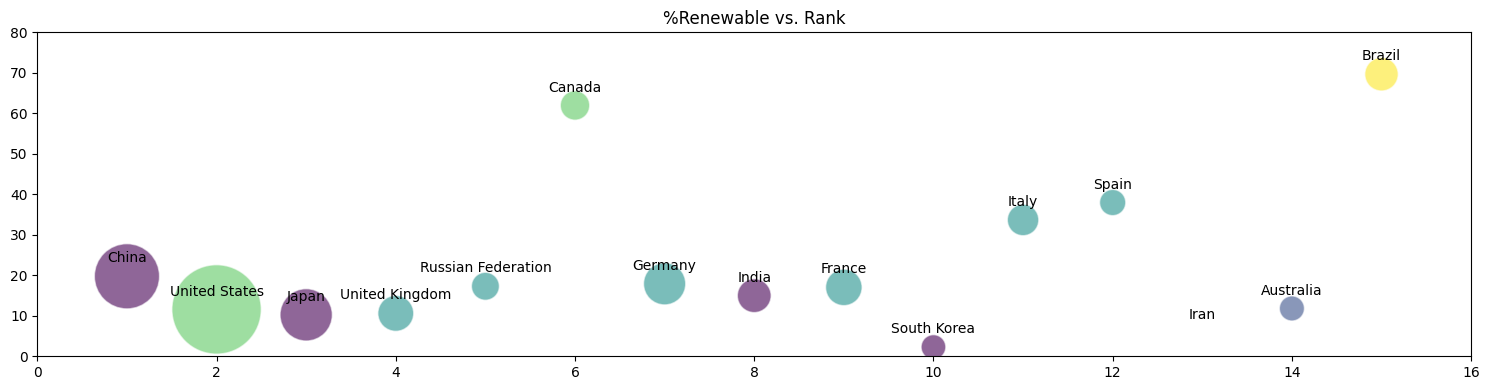

In [998]:
task_fifteen()